In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import joblib


# 1.Understand the Dataset

In [5]:
df=pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [8]:
null_ratio=df.isnull().sum()/len(df)
d_types=df.dtypes
num_unique=df.nunique()
explore=pd.DataFrame({"null_ratio":null_ratio,
                      "dtypes":d_types,
                      "nunique":num_unique})
print(explore)

                           null_ratio  dtypes  nunique
loan_id                           0.0   int64     4269
 no_of_dependents                 0.0   int64        6
 education                        0.0  object        2
 self_employed                    0.0  object        2
 income_annum                     0.0   int64       98
 loan_amount                      0.0   int64      378
 loan_term                        0.0   int64       10
 cibil_score                      0.0   int64      601
 residential_assets_value         0.0   int64      278
 commercial_assets_value          0.0   int64      188
 luxury_assets_value              0.0   int64      379
 bank_asset_value                 0.0   int64      146
 loan_status                      0.0  object        2


In [9]:
df.drop(columns=['loan_id'],inplace=True)

In [10]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

# 2. Exploratory Data Analysis (EDA)

In [11]:
numerical_columns=df.select_dtypes(include='int64').columns
categorical_columns=df.select_dtypes(include='object').columns
target=df[' loan_status']

# Univariate analysis

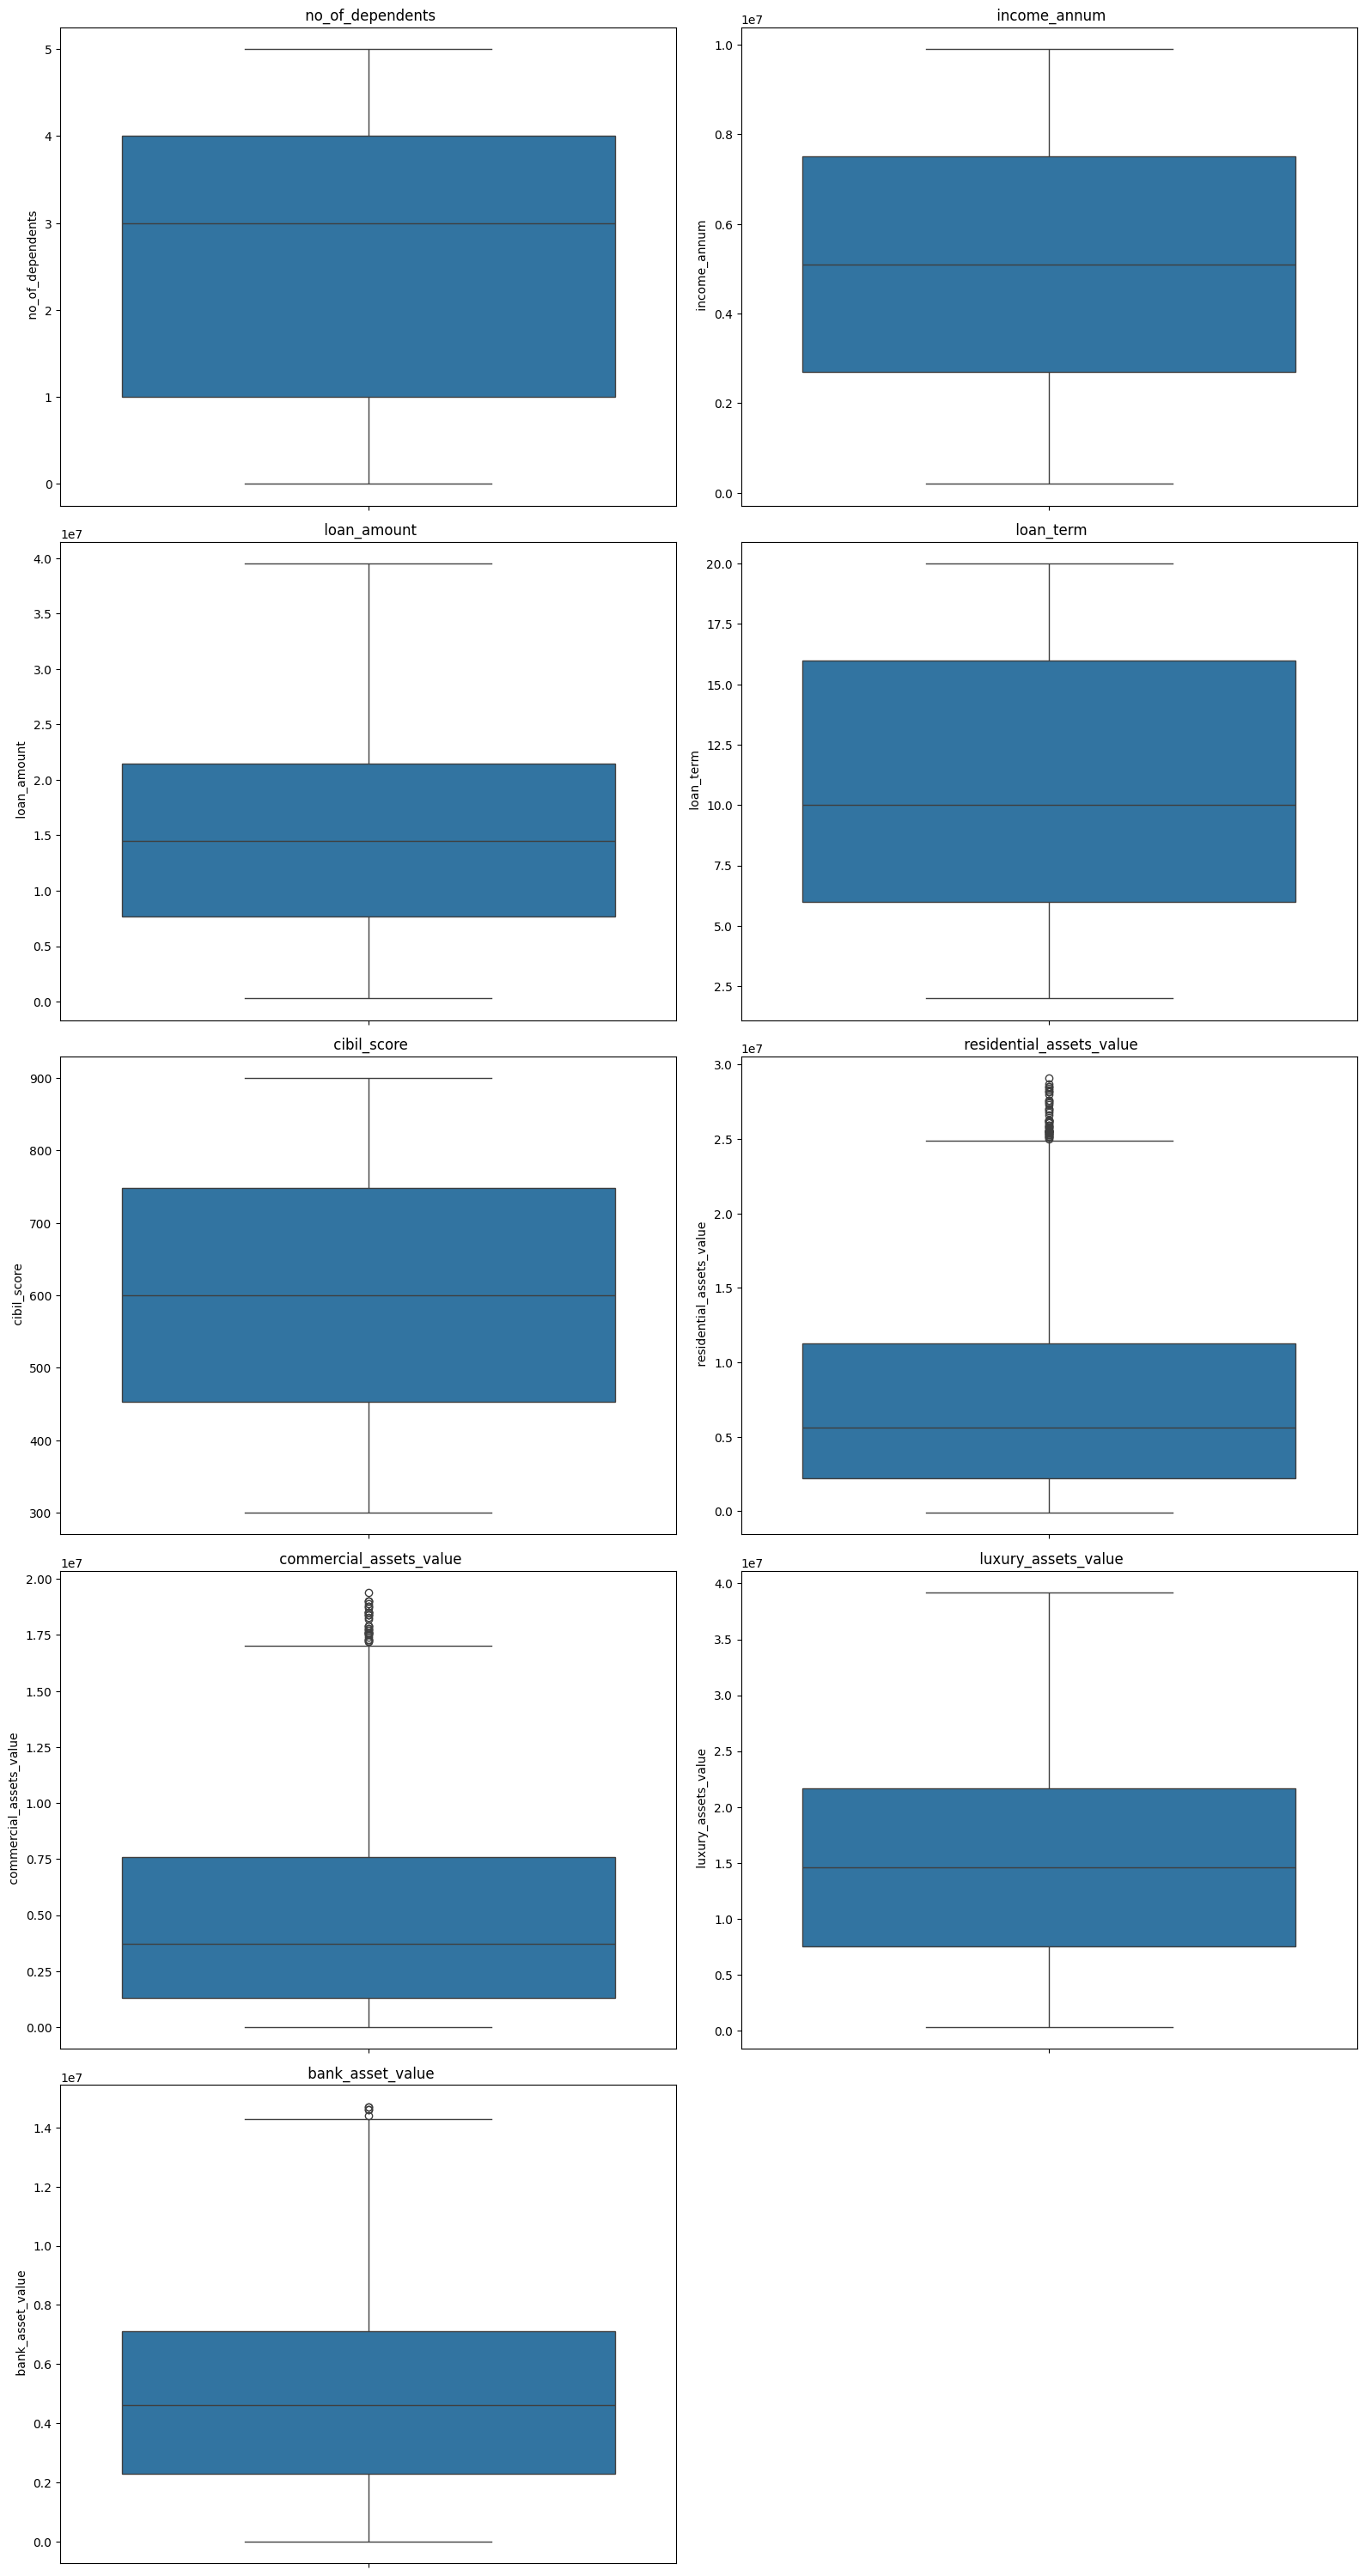

In [12]:
#outliers
n_cols = 2   # number of plots per row
n_rows = (len(numerical_columns))
plt.figure(figsize=(n_cols * 8, n_rows * 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

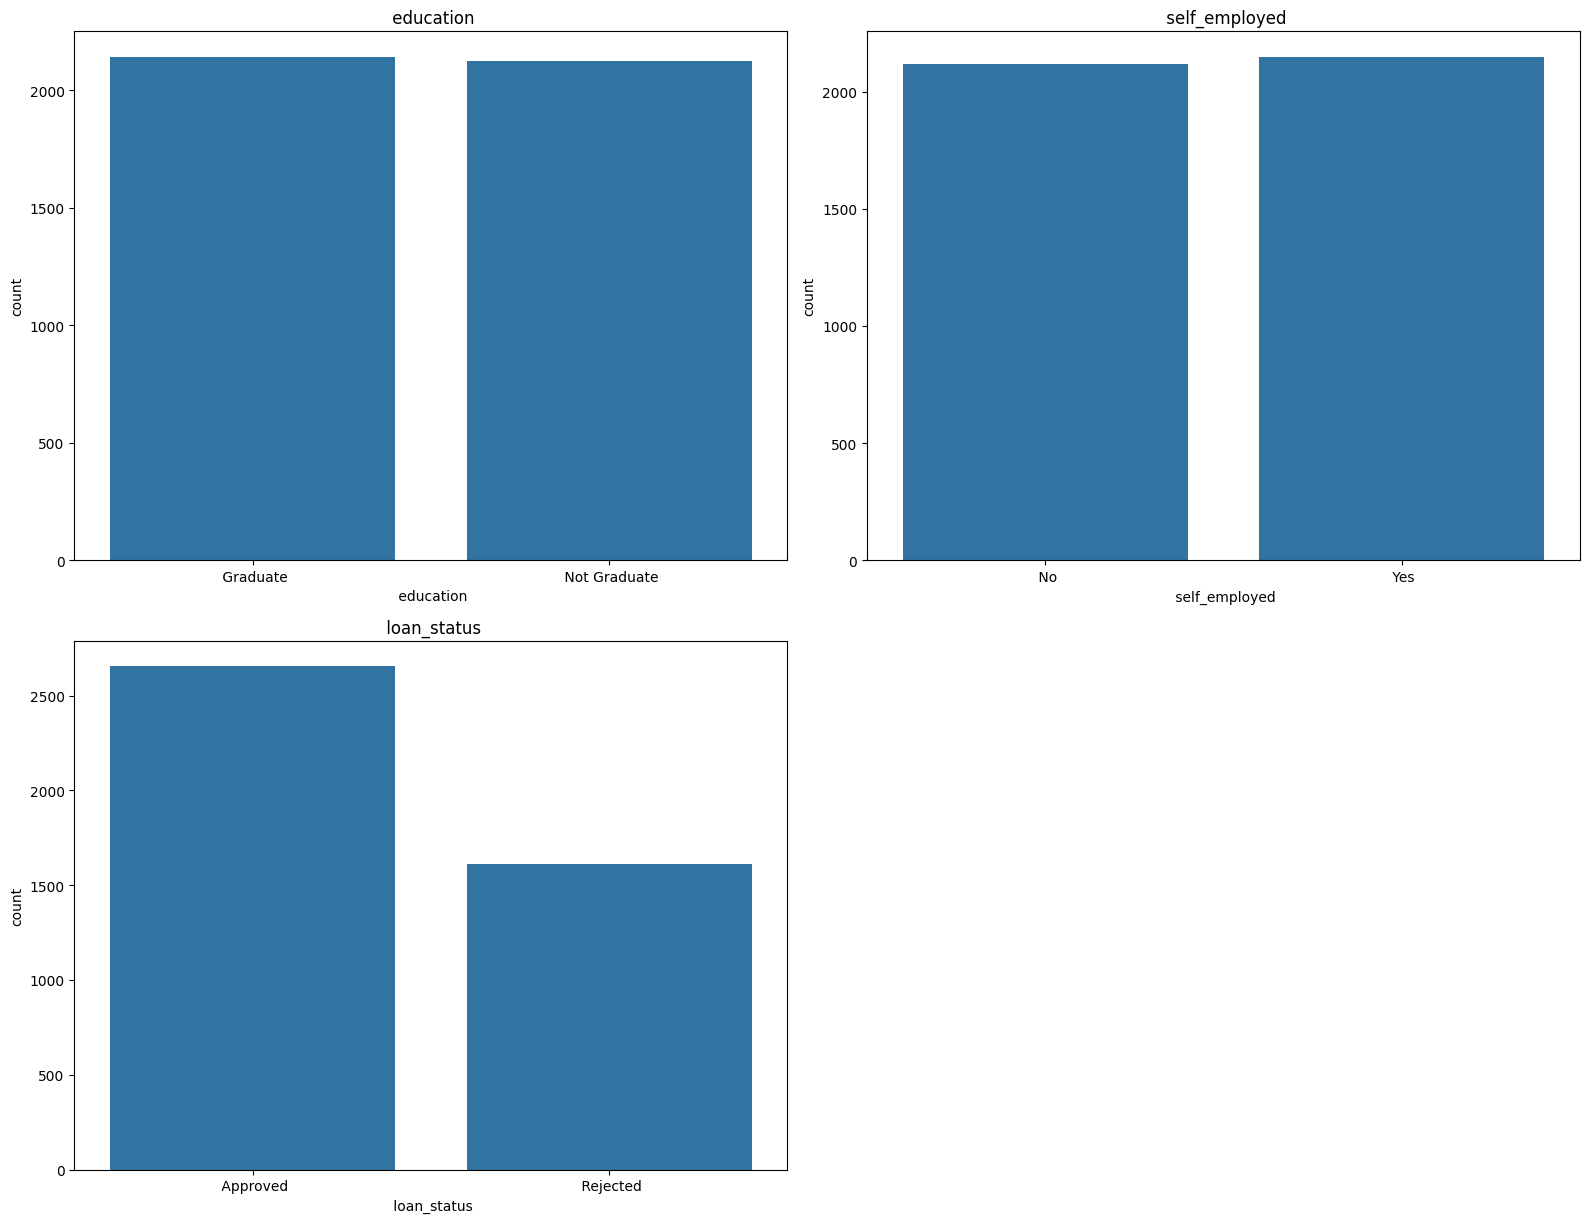

In [13]:
#countplot for categorical
n_cols = 2   # number of plots per row
n_rows = (len(categorical_columns))
plt.figure(figsize=(n_cols * 8, n_rows * 6))
for i, col in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Bivariate analysis

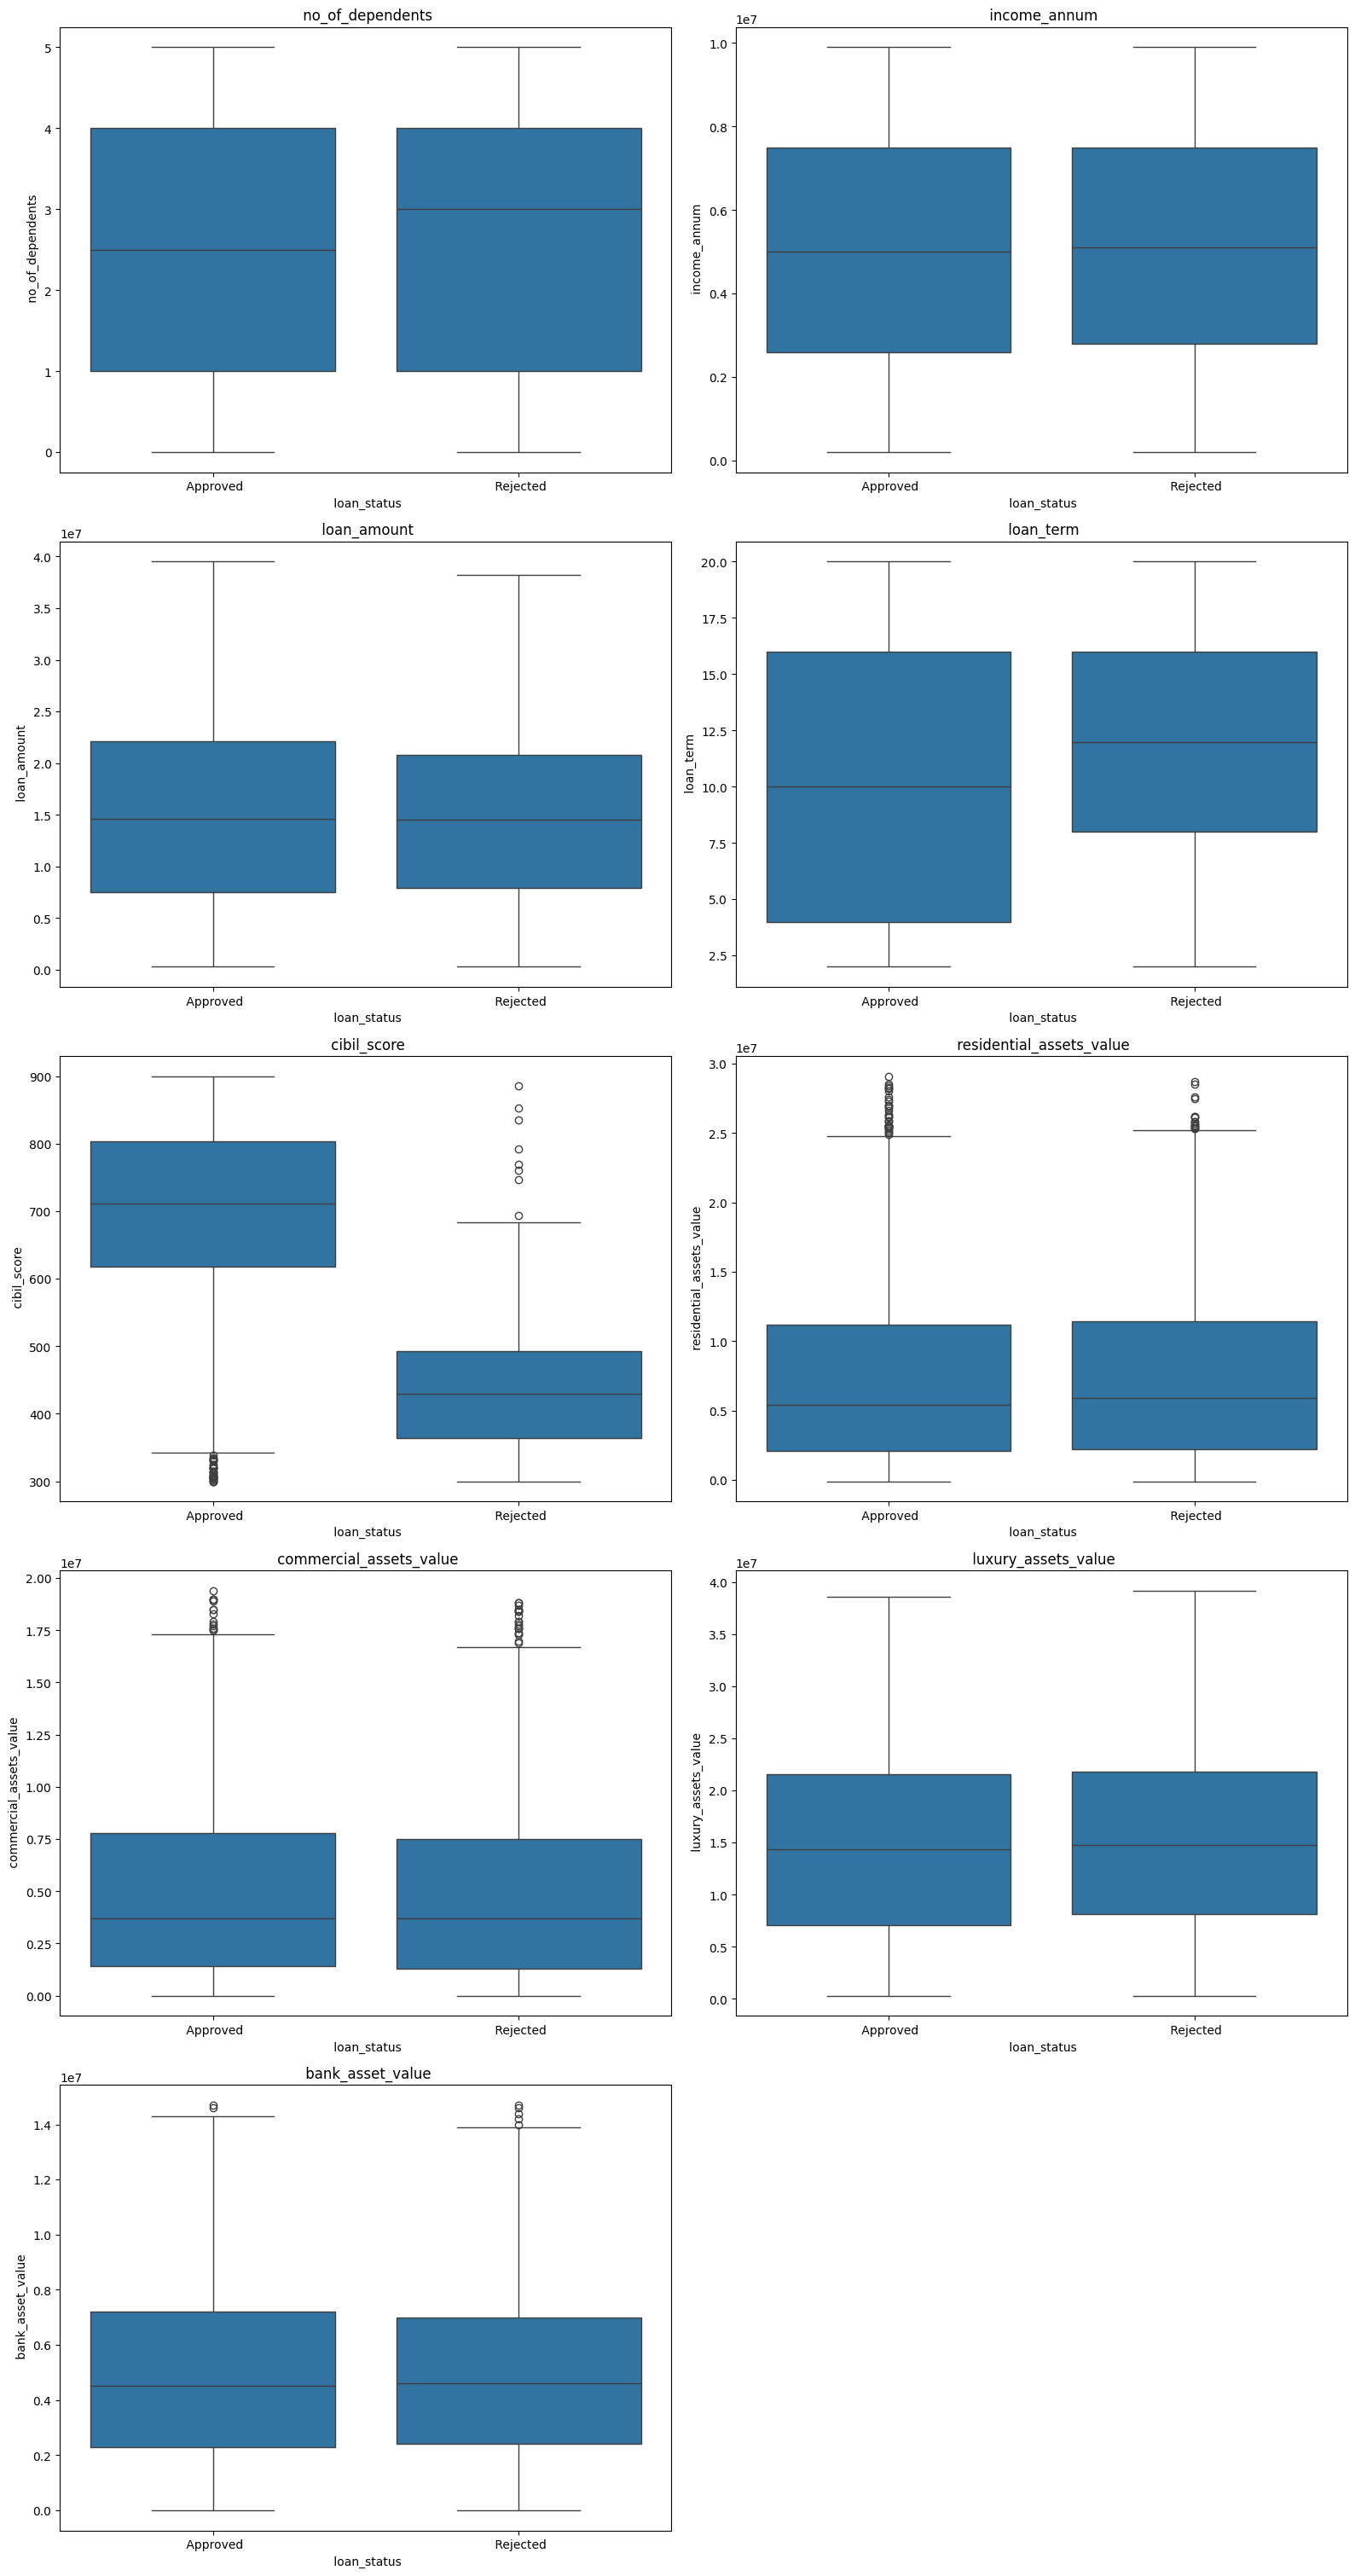

In [14]:
#numerical with target
n_cols = 2   # number of plots per row
n_rows = (len(numerical_columns))
plt.figure(figsize=(n_cols * 8, n_rows * 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col],x=df[' loan_status'])
    plt.title(col)
plt.tight_layout()
plt.show()

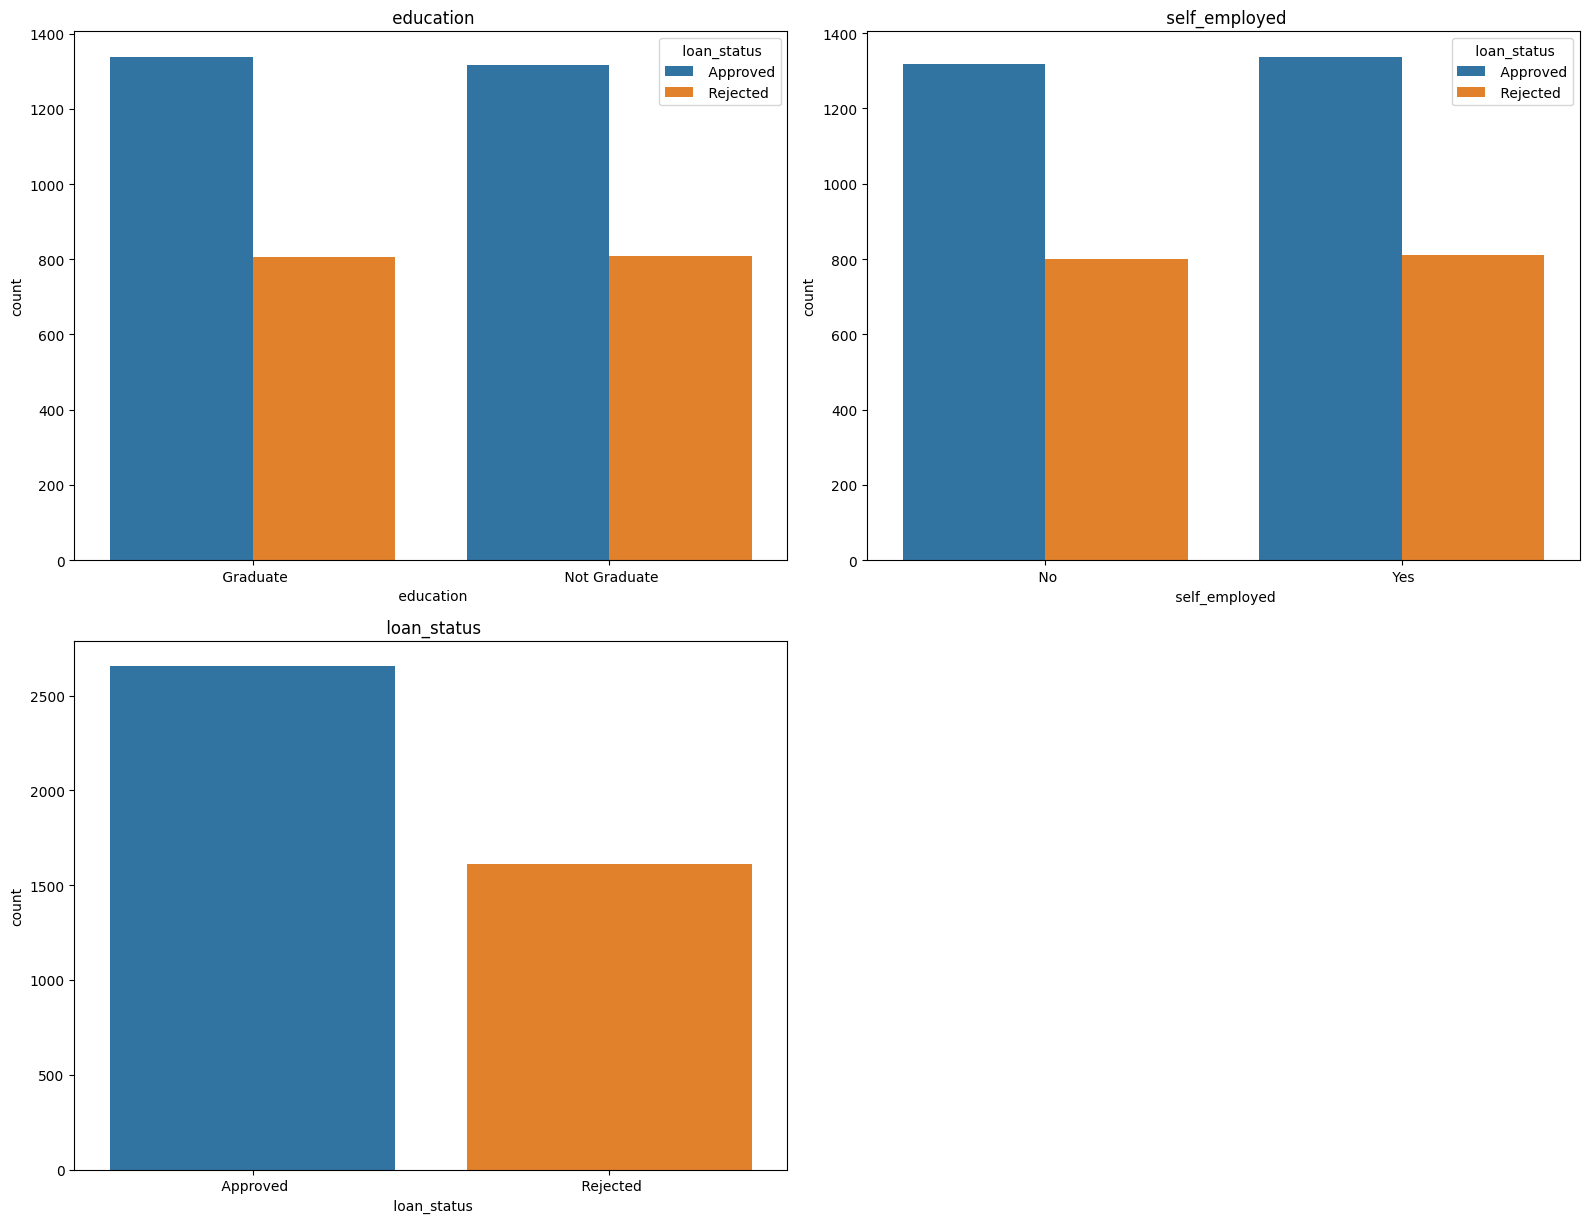

In [15]:
# categorical with target
eda_columns=[col for col in categorical_columns if col!=' loan_status']
n_cols = 2   # number of plots per row
n_rows = (len(categorical_columns))
plt.figure(figsize=(n_cols * 8, n_rows * 6))
for i, col in enumerate(categorical_columns):
  plt.subplot(n_rows, n_cols, i + 1)
  sns.countplot(x=df[col],hue=df[' loan_status'])
  plt.title(col)
plt.tight_layout()
plt.show()

# Correlation analysis

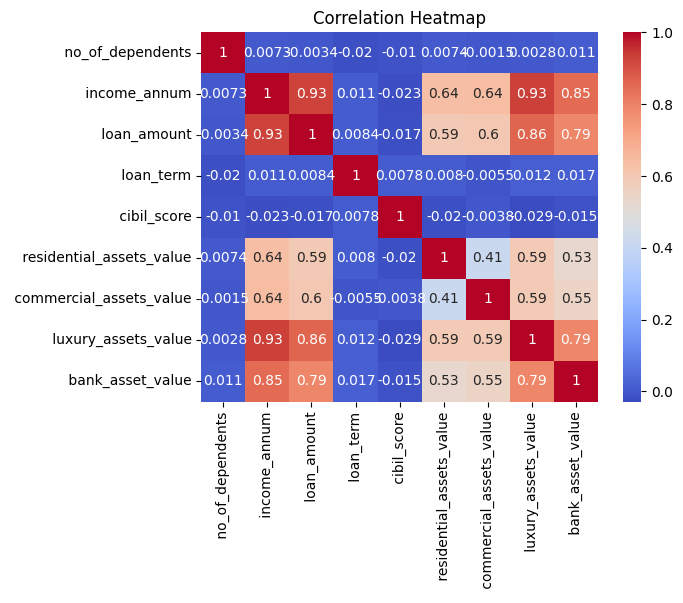

In [16]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 3. Data Preprocessing

In [17]:
#encoding
le=LabelEncoder()
for col in categorical_columns:
  df[col]=le.fit_transform(df[col])

#scaling
scaler= MinMaxScaler()
x=df.drop(columns=[' loan_status'])
y=df[' loan_status']
x=scaler.fit_transform(x)

# 4. Feature Selection & Train/Test Split

In [18]:
best_features=SelectKBest(score_func=chi2,k='all')
x=best_features.fit_transform(x,y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# 5. Model Training & Evaluation

In [22]:
models={
    'Logistic Regression':LogisticRegression(class_weight='balanced',max_iter=500),
    'Decision Tree':DecisionTreeClassifier(random_state=42,class_weight='balanced'),
    'SVM':SVC(class_weight='balanced'),
    'XGBoost':xgb.XGBClassifier(random_state=42,class_weight='balanced')
}
grid_params={
    'Logistic Regression':{
        "penalty": ["l1", "l2"],
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear"]
    },
    'Decision Tree':{
        "criterion": ["gini", "entropy"],
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 5]
    },
    'SVM':{
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"]
    },
    "XGBoost":{
        "n_estimators": [50, 100],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10],
        "subsample": [0.8, 0.9, 1.0],
        "colsample_bytree": [0.8, 0.9, 1.0]
    }
}

for model_name,model in models.items():
  grid_search=GridSearchCV(estimator=model,
                           param_grid=grid_params[model_name],
                           scoring='f1',
                           cv=5,
                           n_jobs=-1)
  grid_search.fit(x_train,y_train)
  best_model=grid_search.best_estimator_
  y_pred=best_model.predict(x_test)
  print(f"Best {model_name} Params:", grid_search.best_params_)
  print(f"Best {model_name} Score:", grid_search.best_score_)
  print(classification_report(y_test,y_pred))

Best Logistic Regression Params: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Logistic Regression Score: 0.9073141447218266
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       536
           1       0.85      0.92      0.88       318

    accuracy                           0.91       854
   macro avg       0.90      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854

Best Decision Tree Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Decision Tree Score: 0.9711028854833852
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       536
           1       0.98      0.97      0.98       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Best SVM Params: {'C': 10, 'gamma': 'scale', 'kernel'

# Train & Save Decision Tree as The Best Model

In [20]:
des_tree=DecisionTreeClassifier(random_state=42,class_weight='balanced', criterion= 'gini', max_depth= None, min_samples_leaf= 2, min_samples_split= 5)
des_tree.fit(x_train,y_train)
y_pred=des_tree.predict(x_test)
print(classification_report(y_test,y_pred))
joblib.dump(des_tree,'loan_approval_model.pkl')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       536
           1       0.98      0.97      0.98       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



['loan_approval_model.pkl']

<Axes: >

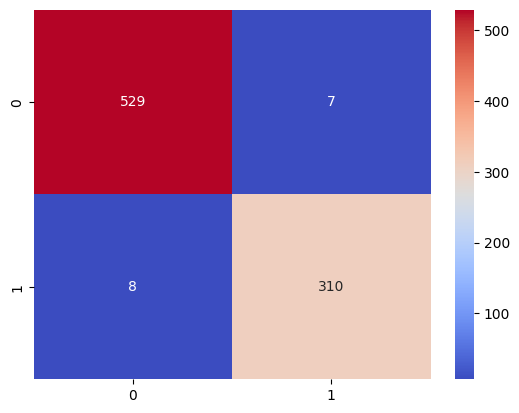

In [21]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d', cmap='coolwarm')